In [20]:
import yfinance as yf
import pandas as pd

In [21]:
data = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Ticker']) #je garderai unqieuemtn les colonnes qui m'interessent

In [22]:
#For having unique tickers
path1 = "news_df.csv"
# #csv read path1
news_df = pd.read_csv(path1)
news_df

,title,content,release_date,ticker
0,Stocks Poised For More Upside,In my experience there is only one motivatio...,2016-04-18,TSLA
1,U S futures point to lower open amid dropping...,Investing com Wall Street futures pointed to...,2016-04-18,NFLX
2,Netflix shares plunge as subscriber forecasts ...,By Anya George Tharakan and Lisa Richwine Reu...,2016-04-18,NFLX
3,Dow reclaims 18 000 as quarterly scorecards st...,By Noel Randewich Reuters The Dow Jones in...,2016-04-18,NFLX
4,Netherlands stocks higher at close of trade A...,Investing com Netherlands stocks were higher...,2016-04-18,ASML
...,...,...,...,...
41992,Netherlands stocks higher at close of trade A...,Investing com Netherlands stocks were higher...,2019-04-15,ASML
41993,Analysts Estimate Hasbro HAS To Report A Dec...,Wall Street expects a year over year decline i...,2019-04-15,HAS
41994,Apple allies seek billions in U S trial test...,By Stephen Nellis Reuters Apple Inc NASDA...,2019-04-15,INTC
41995,Sweden s Veoneer bets driverless car delay wil...,By Johannes Hellstrom and Esha Vaish STOCKHOLM...,2019-04-15,INTC


In [23]:
tickers = news_df['ticker'].unique()


In [24]:
start_date = "2016-04-17"
end_date = "2019-04-16"

In [25]:
for ticker in tickers:
    print(ticker)
    df = yf.download(ticker, start=start_date, end=end_date)
    df["Ticker"] = ticker
    data = pd.concat([df, data], axis=0)



TSLA
[*********************100%***********************]  1 of 1 completed
NFLX
[*********************100%***********************]  1 of 1 completed
ASML
[*********************100%***********************]  1 of 1 completed
PEP
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
COST
[*********************100%***********************]  1 of 1 completed
AAPL
[*********************100%***********************]  1 of 1 completed
SBUX
[*********************100%***********************]  1 of 1 completed
GOOGL
[*********************100%***********************]  1 of 1 completed
CSCO
[*********************100%***********************]  1 of 1 completed
MSFT
[*********************100%***********************]  1 of 1 completed
WDC
[*********************100%***********************]  1 of 1 completed
AMZN
[*********************100%***********************]  1 of 1 completed
MU
[*********************100%**********

In [26]:
data.reset_index(inplace=True)
data

,index,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2016-04-18,89.349998,90.349998,89.199997,90.150002,90.150002,245500,ANSS
1,2016-04-19,90.269997,90.989998,89.760002,90.940002,90.940002,445600,ANSS
2,2016-04-20,90.830002,91.150002,89.349998,90.870003,90.870003,295000,ANSS
3,2016-04-21,91.139999,91.570000,90.279999,90.650002,90.650002,286800,ANSS
4,2016-04-22,90.459999,91.279999,88.910004,91.000000,91.000000,533800,ANSS
...,...,...,...,...,...,...,...,...
49757,2019-04-09,18.110001,18.333332,17.974001,18.153999,18.153999,88560000,TSLA
49758,2019-04-10,18.449333,18.558666,18.192667,18.403999,18.403999,105919500,TSLA
49759,2019-04-11,17.886667,18.033333,17.706667,17.894667,17.894667,147538500,TSLA
49760,2019-04-12,18.014668,18.129999,17.788668,17.846666,17.846666,101190000,TSLA


In [27]:
#rename column index date and make it date to time
data = data.rename(columns={'index': 'Date'})
data['Date'] = pd.to_datetime(data['Date'])


In [28]:
#create a column named market cap that multiplies adj close by volume
data['Market Cap'] = data['Adj Close'] * data['Volume']
data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Market Cap
0,2016-04-18,89.349998,90.349998,89.199997,90.150002,90.150002,245500,ANSS,22131825.374603
1,2016-04-19,90.269997,90.989998,89.760002,90.940002,90.940002,445600,ANSS,40522865.087891
2,2016-04-20,90.830002,91.150002,89.349998,90.870003,90.870003,295000,ANSS,26806650.810242
3,2016-04-21,91.139999,91.570000,90.279999,90.650002,90.650002,286800,ANSS,25998420.437622
4,2016-04-22,90.459999,91.279999,88.910004,91.000000,91.000000,533800,ANSS,48575800.0
...,...,...,...,...,...,...,...,...,...
49757,2019-04-09,18.110001,18.333332,17.974001,18.153999,18.153999,88560000,TSLA,1607718180.541992
49758,2019-04-10,18.449333,18.558666,18.192667,18.403999,18.403999,105919500,TSLA,1949342406.887054
49759,2019-04-11,17.886667,18.033333,17.706667,17.894667,17.894667,147538500,TSLA,2640152278.75042
49760,2019-04-12,18.014668,18.129999,17.788668,17.846666,17.846666,101190000,TSLA,1805904166.545868


In [29]:
#only keep columns date adj close market cap ticker
data = data[['Market Cap', 'Ticker']]

In [30]:
aggregated_df = data.groupby(['Ticker']).mean()
aggregated_df

,Market Cap
Ticker,
AAPL,4.637032e+09
ADBE,5.071831e+08
ADI,2.085213e+08
ADSK,2.257623e+08
ALGN,2.057463e+08
...,...
VRSN,9.700938e+07
VRTX,2.197844e+08
WBA,3.395482e+08


In [31]:
#create new column = the market cap divided by the sum of all market cap
aggregated_df['Average proportion'] = aggregated_df['Market Cap'] / aggregated_df['Market Cap'].sum()
aggregated_df

,Market Cap,Average proportion
Ticker,,
AAPL,4.637032e+09,0.117645
ADBE,5.071831e+08,0.012868
ADI,2.085213e+08,0.005290
ADSK,2.257623e+08,0.005728
ALGN,2.057463e+08,0.005220
...,...,...
VRSN,9.700938e+07,0.002461
VRTX,2.197844e+08,0.005576
WBA,3.395482e+08,0.008615


In [32]:
#order aggregated_df by average proportion
aggregated_df = aggregated_df.sort_values(by=['Average proportion'], ascending=False)
aggregated_df

,Market Cap,Average proportion
Ticker,,
AMZN,5.634331e+09,0.142947
AAPL,4.637032e+09,0.117645
NVDA,2.276909e+09,0.057767
NFLX,2.150078e+09,0.054549
MSFT,2.123174e+09,0.053867
...,...,...
CDNS,8.215158e+07,0.002084
CTAS,8.124618e+07,0.002061
LBTYA,7.215855e+07,0.001831


In [33]:
#delete the column market cap
aggregated_df = aggregated_df.drop(columns=['Market Cap'])
aggregated_df['Average proportion'] = aggregated_df['Average proportion'] * 100
aggregated_df

,Average proportion
Ticker,
AMZN,14.294718
AAPL,11.764495
NVDA,5.776688
NFLX,5.454909
MSFT,5.386651
...,...
CDNS,0.208425
CTAS,0.206128
LBTYA,0.183072


In [34]:
#make ticker a column
aggregated_df = aggregated_df.reset_index()
aggregated_df

,Ticker,Average proportion
0,AMZN,14.294718
1,AAPL,11.764495
2,NVDA,5.776688
3,NFLX,5.454909
4,MSFT,5.386651
...,...,...
61,CDNS,0.208425
62,CTAS,0.206128
63,LBTYA,0.183072
64,ANSS,0.175152


In [35]:
#add following ticker element to aggregated_df 'XLNX', 'MYL', 'ALXN', 'CERN', 'MXIM' with average proportion 0
aggregated_df = aggregated_df.append({'Ticker': 'XLNX', 'Average proportion': 0}, ignore_index=True)
aggregated_df = aggregated_df.append({'Ticker': 'MYL', 'Average proportion': 0}, ignore_index=True)
aggregated_df = aggregated_df.append({'Ticker': 'ALXN', 'Average proportion': 0}, ignore_index=True)
aggregated_df = aggregated_df.append({'Ticker': 'CERN', 'Average proportion': 0}, ignore_index=True)
aggregated_df = aggregated_df.append({'Ticker': 'MXIM', 'Average proportion': 0}, ignore_index=True)
aggregated_df

C:\Users\cleme\AppData\Local\Temp\ipykernel_31596\491138747.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_df = aggregated_df.append({'Ticker': 'XLNX', 'Average proportion': 0}, ignore_index=True)
C:\Users\cleme\AppData\Local\Temp\ipykernel_31596\491138747.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_df = aggregated_df.append({'Ticker': 'MYL', 'Average proportion': 0}, ignore_index=True)
C:\Users\cleme\AppData\Local\Temp\ipykernel_31596\491138747.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aggregated_df = aggregated_df.append({'Ticker': 'ALXN', 'Average proportion': 0}, ignore_index=True)
C:\Users\cleme\AppData\Local\Temp\ipykernel_31596\491138747.py:5: FutureWarning: The frame.appe

,Ticker,Average proportion
0,AMZN,14.294718
1,AAPL,11.764495
2,NVDA,5.776688
3,NFLX,5.454909
4,MSFT,5.386651
...,...,...
66,XLNX,0.000000
67,MYL,0.000000
68,ALXN,0.000000
69,CERN,0.000000


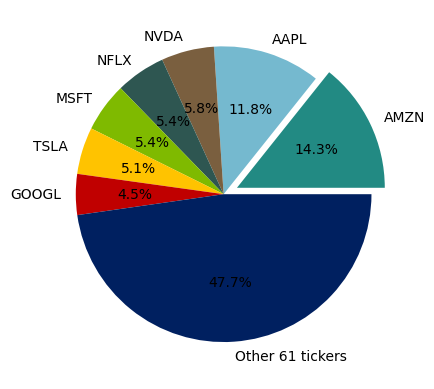

In [37]:
import matplotlib.pyplot as plt

# 7A5F3F - brown
# C00000 - red
# 2E5651 - dark green
# #75B9CF - light blue
#228A83 - green
#333F50 - dark blue
#002060 - blue



# Define the data
proportions = [14.281194, 11.769622, 5.771223, 5.449748, 5.393319, 5.135215, 4.460561, 47.739119]
labels = ['AMZN', 'AAPL', 'NVDA', 'NFLX', 'MSFT', 'TSLA', 'GOOGL', 'Other 61 tickers']
colors = ['#228A83', '#75B9CF', '#7A5F3F', '#2E5651', '#7FBA00', '#FFC300', '#C00000', '#002060']
explode = [0.1, 0, 0, 0, 0, 0, 0, 0] # explode the first wedge

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the pie chart with modifications
ax.pie(proportions, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)

# Add a title to the plot
# ax.set_title('Average market cap proportion in Nasdaq100 index between 2016 and 2019', fontsize=12, fontweight='bold', color = '#2E5651')

# Add a legend to the plot
# ax.legend(loc='upper right', bbox_to_anchor=(1.7, 1))

# Show the plot
plt.show()


In [79]:
aggregated_df.to_csv("../Database/ticker_prop.csv", index=False)
